In [87]:

#pip install pylatexenc
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import time
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import array_to_latex

aer_sim = Aer.get_backend('aer_simulator')

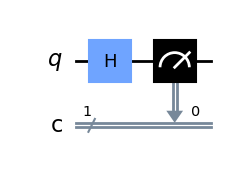

{'1': 507, '0': 517}


In [36]:
# hadamard gate outpur

qc_hg0 = QuantumCircuit(1,1)

qc_hg0.h(0)

# measure and display
qc_hg0.measure(range(1), range(1))
display(qc_hg0.draw(output="mpl"))

# get the result
results = aer_sim.run(qc_hg0).result()
print(results.get_counts())

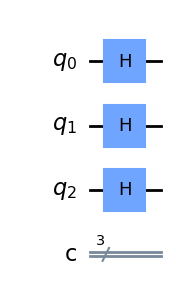

<IPython.core.display.Latex object>

In [53]:

# hadamard gate
# each state in 2-qubit has equal probability to get measured
qc_hg = QuantumCircuit(3,3)

qc_hg.h(0)
#qc_hg.x(1)
qc_hg.h(1)
qc_hg.h(2)

#
display(qc_hg.draw(output="mpl"))

# Note: either view statevector or measure result , comment respective code

# view state vector
qc_hg.save_statevector()
qobj = assemble(qc_hg)
array_to_latex( aer_sim.run(qobj).result().get_statevector(), prefix="\\text{Statevector} = ")

# measure result
qc_hg.measure(range(3),range(3))
print(aer_sim.run(qc_hg).result().get_counts())


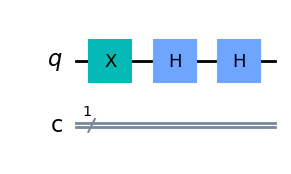

<IPython.core.display.Latex object>

In [63]:
# reset state with 2- hadamard gates for 1 qubit

qc_1hg = QuantumCircuit(1,1)

qc_1hg.x(0)
qc_1hg.h(0)
qc_1hg.h(0)

# display circuit
display(qc_1hg.draw(output="mpl"))

# Note: either view statevector or measure result , comment respective code

# view state vector
qc_1hg.save_statevector()
array_to_latex(aer_sim.run(assemble(qc_1hg)).result().get_statevector(), prefix="\\text{Statevector} = ")

# measure result
#qc_1hg.measure(range(1),range(1))
#print("Measurement Result",aer_sim.run(qc_1hg).result().get_counts())

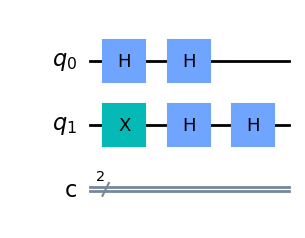

<IPython.core.display.Latex object>

In [65]:
# reset state with 2- hadamard gates for 2 qubits

qc_2hg = QuantumCircuit(2,2)

qc_2hg.h(0)
qc_2hg.x(1)
qc_2hg.h(1)
qc_2hg.h(0)
qc_2hg.h(1)

# display circuit 
display(qc_2hg.draw(output="mpl"))

# Note: either view statevector or measure result , comment respective code

# view state vector
qc_2hg.save_statevector()
array_to_latex(aer_sim.run(assemble(qc_1hg)).result().get_statevector(), prefix="\\text{Statevector} = ")

# measure result
#qc_2hg.measure(range(2),range(2))
#print("Measurement Result", aer_sim.run(qc_2hg).result().get_counts())

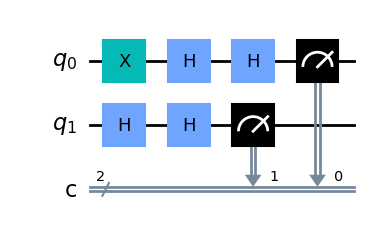

{'01': 1024}


In [34]:
# reset qubit state

qc_2 = QuantumCircuit(2,2)
qc_2.x(0)
qc_2.h(0)
qc_2.h(1)
qc_2.h(0)
qc_2.h(1)

qc_2.measure(range(2), range(2))
display(qc_2.draw(output="mpl"))
aer_sim = Aer.get_backend('aer_simulator')

results = aer_sim.run(qc_2).result()
print(results.get_counts())

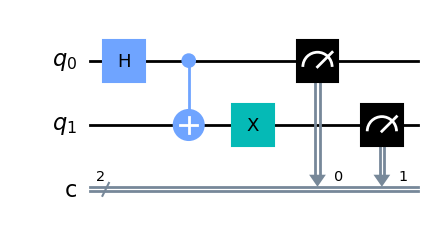

{'01': 500, '10': 524}


In [21]:
# flip gate after entangelement 

qc_etafg = QuantumCircuit(2,2)

#apply gates 
qc_etafg.h(0)
qc_etafg.cx(0,1)
qc_etafg.x(1)

# measure and display
qc_etafg.measure(range(2), range(2))
display(qc_etafg.draw(output="mpl"))

# get the result
results = Aer.get_backend('aer_simulator').run(qc_etafg).result()
print(results.get_counts())

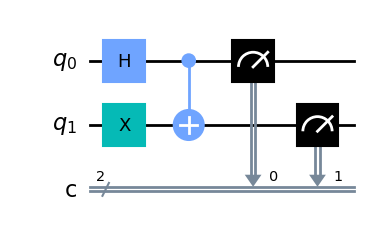

{'01': 523, '10': 501}


In [24]:
# flip gate before entangelement 

qc_etbfg = QuantumCircuit(2,2)

#apply gates 
qc_etbfg.h(0)
qc_etbfg.x(1)
qc_etbfg.cx(0,1)

# measure and display
qc_etbfg.measure(range(2), range(2))
display(qc_etbfg.draw(output="mpl"))

# get the result
results = Aer.get_backend('aer_simulator').run(qc_etbfg).result()
print(results.get_counts())

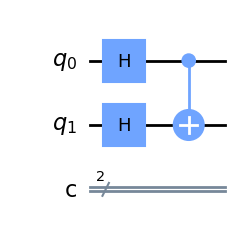

<IPython.core.display.Latex object>

In [39]:
# entanglement qith 2 H-gates
qc_se = QuantumCircuit(2,2)
qc_se.h(0)
#qc_se.x(1)
qc_se.h(1)
qc_se.cx(0,1)

display(qc_se.draw(output="mpl"))

# view state vector
qc_se.save_statevector()
state_vector_se = aer_sim.run(assemble(qc_se)).result().get_statevector()
array_to_latex(state_vector_se, prefix="\\text{Statevector} = ")
#plot_state_qsphere(state_vector_se)
#plot_bloch_multivector(state_vector_se)
# measure result
#qc_se.measure(range(2), range(2))
#print(aer_sim.run(qc_se).result().get_counts())

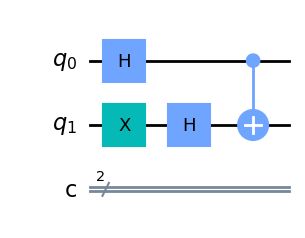

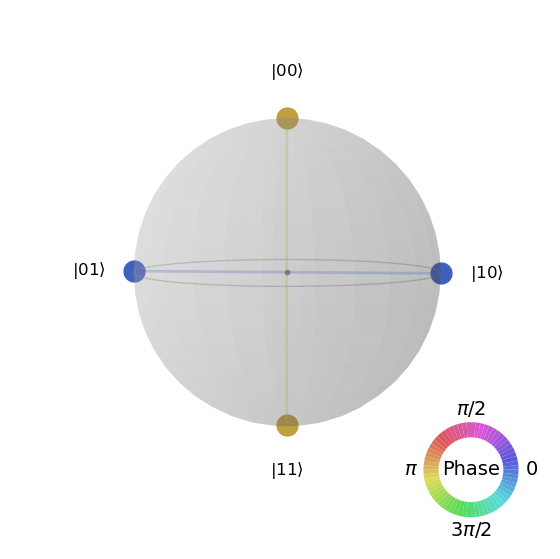

In [26]:
# entangle 2 -qubits in superposition with 2 H-gates
qc_et2q = QuantumCircuit(2,2)

#apply gates 
qc_et2q.h(0)
qc_et2q.x(1)
qc_et2q.h(1)
qc_et2q.cx(0,1)

# measure and display

display(qc_et2q.draw(output="mpl"))

# view state vector
qc_et2q.save_statevector()
state_vector_et2q = aer_sim.run(assemble(qc_et2q)).result().get_statevector()
array_to_latex(state_vector_et2q, prefix="\\text{Statevector} = ")
plot_state_qsphere(state_vector_et2q)

# get the result
#qc_et2q.measure(range(2), range(2))
#results = Aer.get_backend('aer_simulator').run(qc_et2q).result()
#print(results.get_counts())

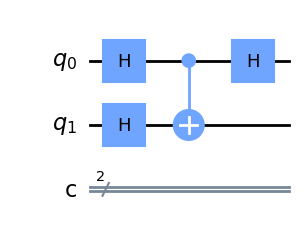

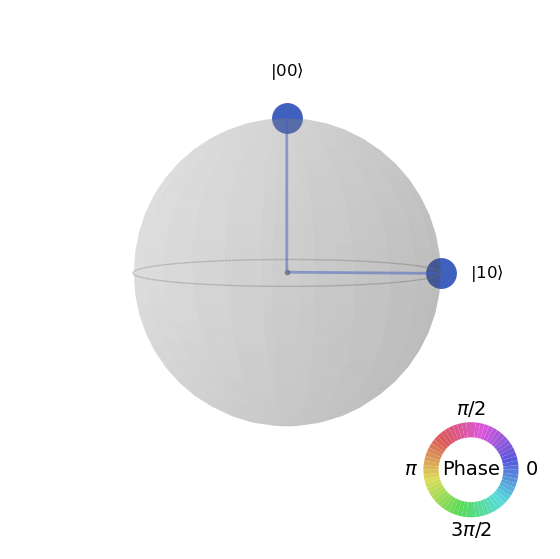

In [41]:
# phase kickback without flip with two h gates on first qubit
qc_phf2 = QuantumCircuit(2,2)

qc_phf2.h(0)
#qc_phf2.x(1)
qc_phf2.h(1)
qc_phf2.cx(0,1)
qc_phf2.h(0)

#  display circuit
display(qc_phf2.draw(output="mpl"))

# view state vector
qc_phf2.save_statevector()
state_vector_phf2 = aer_sim.run(assemble(qc_phf2)).result().get_statevector()
array_to_latex(state_vector_phf2, prefix="\\text{Statevector} = ")
plot_state_qsphere(state_vector_phf2)
#plot_bloch_multivector(state_vector_phf2)

# measure result
#qc_phf2.measure(range(2), range(2))
#display(qc_phf2.draw(output="mpl"))
#print(aer_sim.run(qc_phf2).result().get_counts())


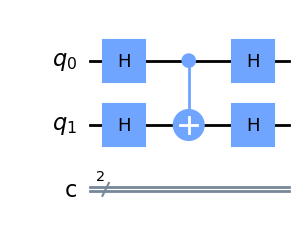

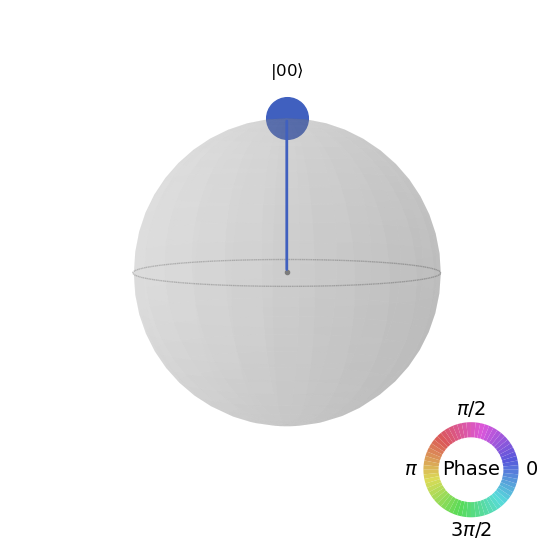

In [18]:
# phase kickback without flip

qc_phf = QuantumCircuit(2,2)

qc_phf.h(0)
qc_phf.h(1)
qc_phf.cx(0,1)
qc_phf.h(0)
qc_phf.h(1)

#  display circuit
display(qc_phf.draw(output="mpl"))

# view state vector
qc_phf.save_statevector()
state_vector_phf = aer_sim.run(assemble(qc_phf)).result().get_statevector()
array_to_latex(state_vector_phf, prefix="\\text{Statevector} = ")
plot_state_qsphere(state_vector_phf)

# measure result
#qc_phf.measure(range(2), range(2))
#print(aer_sim.run(qc_phf).result().get_counts())


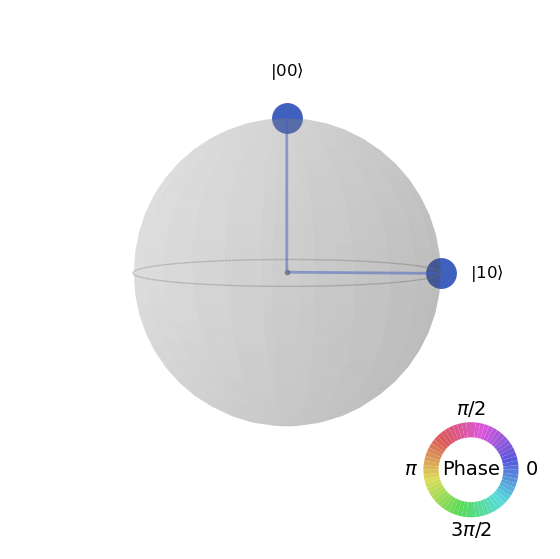

In [11]:
plot_state_qsphere(state_vector_phf2)

In [12]:
array_to_latex(state_vector_phf2, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

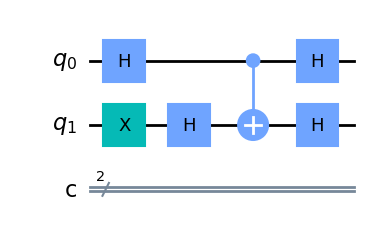

{'11': 1024}


In [80]:

# phase kickback with flip

qc_phwf = QuantumCircuit(2,2)
qc_phwf.x(1)
qc_phwf.h(0)
qc_phwf.h(1)
qc_phwf.cx(0,1)
qc_phwf.h(0)
qc_phwf.h(1)


display(qc_phwf.draw(output="mpl"))

qc_phwf.measure(range(2), range(2))
print(aer_sim.run(qc_phwf).result().get_counts())


In [44]:
# rotation gates

qc_3 = QuantumCircuit(1,1)
#qc_2.x(0)
qc_2.rx(0)
#qc_2.h(1)
#qc_2.h(0)
#qc_2.h(1)

qc_2.measure(range(1), range(1))
display(qc_2.draw(output="mpl"))
aer_sim = Aer.get_backend('aer_simulator')

results = aer_sim.run(qc_2).result()
print(results.get_counts())

TypeError: rx() missing 1 required positional argument: 'qubit'